## 1. loss, f1, accの関係について実験

In [1]:
import warnings;warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

### acc vs f1

Text(1, 0.88, '↓')

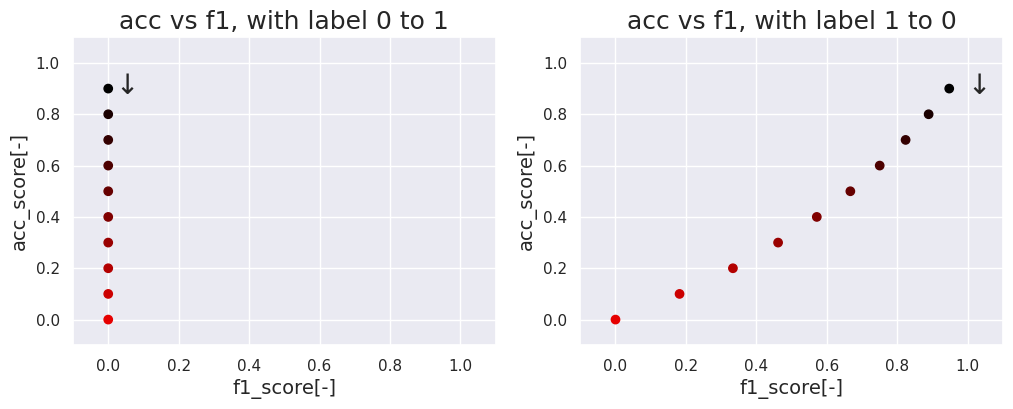

In [2]:
N = 10
fig, ax = plt.subplots(1, 2, facecolor="white", figsize=(12, 4))
clr_rgb = [(x/N, 0, 0) for x in range(N)]

df = pd.DataFrame({
    "y_true": [0]*N,
    "y_pred": [0]*N
})
f1_list = []
acc_list = []
for i in range(df.shape[0]):
    df.loc[i, "y_pred"] = 1
    f1_list.append(f1_score(df["y_true"], df["y_pred"]))
    acc_list.append(accuracy_score(df["y_true"], df["y_pred"]))
ax[0].scatter(f1_list, acc_list, c=clr_rgb)
ax[0].set_title("acc vs f1, with label 0 to 1", fontsize=18)
ax[0].set_xlabel("f1_score[-]", fontsize=14)
ax[0].set_ylabel("acc_score[-]", fontsize=14)
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-0.1, 1.1])
ax[0].text(0.02, 0.88, "↓", fontsize=20)

df = pd.DataFrame({
    "y_true": [1]*N,
    "y_pred": [1]*N
})
f1_list = []
acc_list = []
for i in range(df.shape[0]):
    df.loc[i, "y_pred"] = 0
    f1_list.append(f1_score(df["y_true"], df["y_pred"]))
    acc_list.append(accuracy_score(df["y_true"], df["y_pred"]))
ax[1].scatter(f1_list, acc_list, c=clr_rgb)
ax[1].set_title("acc vs f1, with label 1 to 0", fontsize=18)
ax[1].set_xlabel("f1_score[-]", fontsize=14)
ax[1].set_ylabel("acc_score[-]", fontsize=14)
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylim([-0.1, 1.1])
ax[1].text(1, 0.88, "↓", fontsize=20)

### pre vs rec

(-0.1, 1.1)

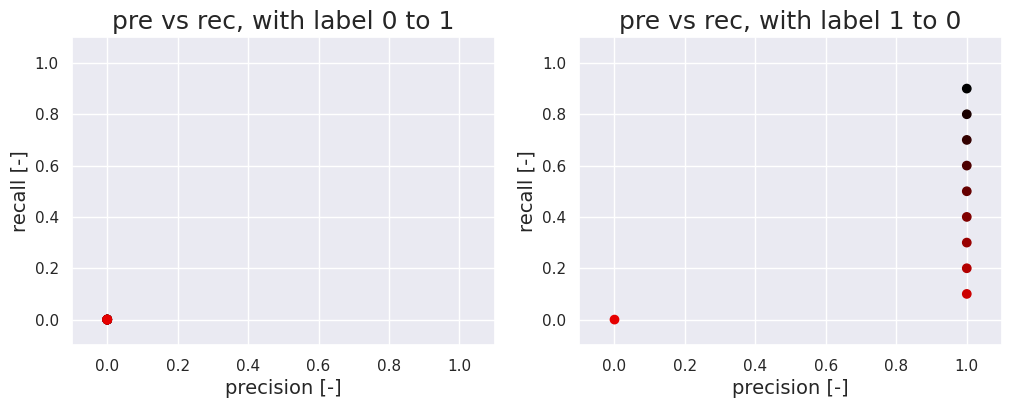

In [3]:
N = 10
clr_rgb = [(x/N, 0, 0) for x in range(N)]

fig, ax = plt.subplots(1, 2, facecolor="white", figsize=(12, 4))

df = pd.DataFrame({
    "y_true": [0]*N,
    "y_pred": [0]*N
})
pre_list = []
rec_list = []
for i in range(df.shape[0]):
    df.loc[i, "y_pred"] = 1
    pre_list.append(precision_score(df["y_true"], df["y_pred"]))
    rec_list.append(recall_score(df["y_true"], df["y_pred"]))
ax[0].scatter(pre_list, rec_list, c=clr_rgb)
ax[0].set_title("pre vs rec, with label 0 to 1", fontsize=18)
ax[0].set_xlabel("precision [-]", fontsize=14)
ax[0].set_ylabel("recall [-]", fontsize=14)
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-0.1, 1.1])

df = pd.DataFrame({
    "y_true": [1]*N,
    "y_pred": [1]*N
})
pre_list = []
rec_list = []
for i in range(df.shape[0]):
    df.loc[i, "y_pred"] = 0
    pre_list.append(precision_score(df["y_true"], df["y_pred"]))
    rec_list.append(recall_score(df["y_true"], df["y_pred"]))
ax[1].scatter(pre_list, rec_list, c=clr_rgb)
ax[1].set_title("pre vs rec, with label 1 to 0", fontsize=18)
ax[1].set_xlabel("precision [-]", fontsize=14)
ax[1].set_ylabel("recall [-]", fontsize=14)
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_ylim([-0.1, 1.1])

### 存在比が同じまま、サンプル数が増えた場合の推移 --

Text(0, 0.5, 'pre_score[-]')

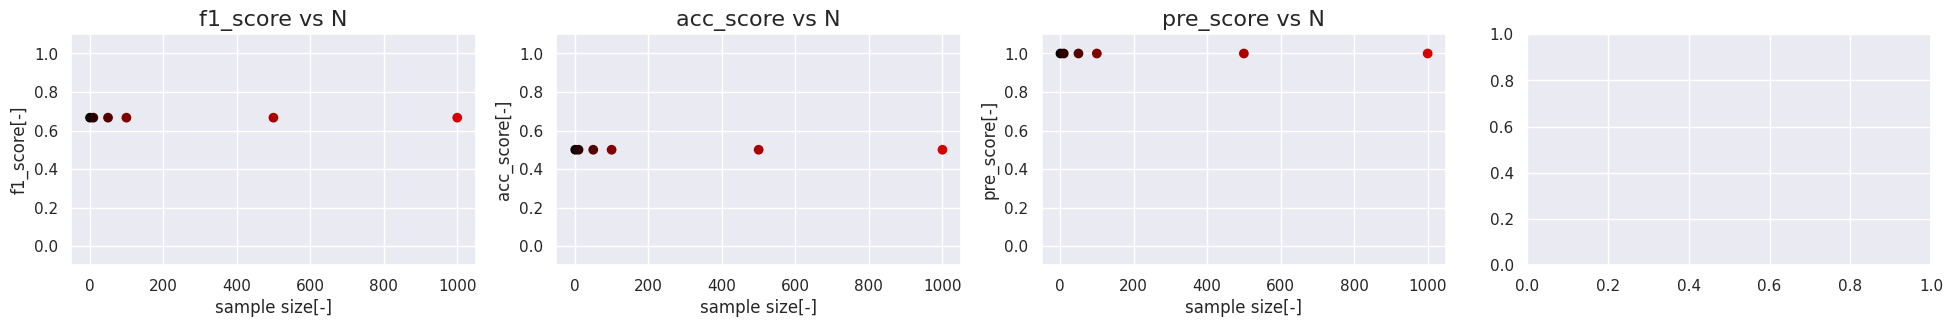

In [8]:
p = 5
y_true = [1]* 10
y_pred = [1]*p + [0]*(10-p)

n_list = [1, 10, 50, 100, 500, 1000]

clr_rgb = [(x/len(n_list), 0, 0) for x in range(len(n_list))]

f1_list = []
acc_list = []
pre_list = []
rec_list = []

fig, ax = plt.subplots(1, 4, facecolor="white", figsize=(24, 3))

for n in n_list:
    df = pd.DataFrame({
        "y_true": y_true,
        "y_pred": y_pred
    })
    dfs = []
    for i in range(n):
        dfs.append(df)
    tdf = pd.concat(dfs)
    f1_list.append(f1_score(tdf["y_true"], tdf["y_pred"]))
    acc_list.append(accuracy_score(tdf["y_true"], tdf["y_pred"]))
    pre_list.append(precision_score(tdf["y_true"], tdf["y_pred"]))
    rec_list.append(recall_score(tdf["y_true"], tdf["y_pred"]))

ax[0].scatter(n_list, f1_list, c=clr_rgb)
ax[0].set_xlim([-50, 1050])
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_title("f1_score vs N", fontsize=16)
ax[0].set_xlabel("sample size[-]")
ax[0].set_ylabel("f1_score[-]")

ax[1].scatter(n_list, acc_list, c=clr_rgb)
ax[1].set_xlim([-50, 1050])
ax[1].set_ylim([-0.1, 1.1])
ax[1].set_title("acc_score vs N", fontsize=16)
ax[1].set_xlabel("sample size[-]")
ax[1].set_ylabel("acc_score[-]")

ax[2].scatter(n_list, pre_list, c=clr_rgb)
ax[2].set_xlim([-50, 1050])
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_title("pre_score vs N", fontsize=16)
ax[2].set_xlabel("sample size[-]")
ax[2].set_ylabel("pre_score[-]")

つまり
* 全部0 ... (pre, rec) = (0, 0)
* 全部1 ... (pre, rec) = (1, 0.9) <br>
f1 (=pre, rec)は0/1が等価でないことに注意

* ざっくりいうと「検証データに正解ラベルの数が増えるほどf1は高くなりやすい」 <br>
=> 今回の例でいうと、Trainに外部からpseudo-label=1のデータをいっぱい突っ込んでも <br>
　Testに含まれる真のlabel==1は増えないので、モデルの性能が上がらなければValidのf1ばっかり上がっていく
    
    * それはそれで語弊があるな...
        * とりあえず「データの存在比は揃えといたほうがいいんでね？」という観点もあるという
            * それってモデルがランダム予測しかできてないってことでは？...

## 2. BinaryCrossEntropyの値の感じを知りたい --

In [57]:
import torch
import torch.nn as nn

loss_f = nn.BCELoss()
#n_list = [1, 10, 50, 100, 500, 1000]
p_list = np.arange(0, 1.1, 0.1)
loss_list = []
for p in p_list:
    y_true = [1]*1
    y_pred = [p]*1
    df = pd.DataFrame({
        "y_true": y_true,
        "y_pred": y_pred
    })
    dfs = []
    for i in range(100):
        dfs.append(df)
    tdf = pd.concat(dfs)
    loss_list.append(
        loss_f(
            torch.Tensor(df["y_pred"]),
            torch.Tensor(df["y_true"]))
    )
loss_list  # 

[tensor(100.),
 tensor(2.3026),
 tensor(1.6094),
 tensor(1.2040),
 tensor(0.9163),
 tensor(0.6931),
 tensor(0.5108),
 tensor(0.3567),
 tensor(0.2231),
 tensor(0.1054),
 tensor(0.)]

In [58]:
import torch
import torch.nn as nn

loss_f = nn.BCELoss()
#n_list = [1, 10, 50, 100, 500, 1000]
p_list = np.arange(0, 1.1, 0.1)
loss_list = []
for p in p_list:
    y_true = [0]*1
    y_pred = [p]*1
    df = pd.DataFrame({
        "y_true": y_true,
        "y_pred": y_pred
    })
    dfs = []
    for i in range(100):
        dfs.append(df)
    tdf = pd.concat(dfs)
    loss_list.append(
        loss_f(
            torch.Tensor(df["y_pred"]),
            torch.Tensor(df["y_true"]))
    )
loss_list  # 

[tensor(0.),
 tensor(0.1054),
 tensor(0.2231),
 tensor(0.3567),
 tensor(0.5108),
 tensor(0.6931),
 tensor(0.9163),
 tensor(1.2040),
 tensor(1.6094),
 tensor(2.3026),
 tensor(100.)]

* サンプル数で値が変わるなんてそんなアホな話はない<br>
* 正例・負例に対して等価
* 10%外しで0.1054, 50%外しで0.6931